In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import glob
import seaborn as sns
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [3]:
os.chdir('D:\\project\pictures')
data_dir = 'trainData'

os.listdir(data_dir)

['mold', 'over_ripe', 'ripe', 'rotten', 'unripe']

In [4]:
os.chdir('D:\\project\pictures')
data_dir = 'validationData'

os.listdir(data_dir)

['mold', 'over_ripe', 'ripe', 'rotten', 'unripe']

In [5]:
SIZE = 128

train_images = []
train_labels = []
for directory_path in glob.glob("D:\\project/pictures/trainData/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
train_images = np.array(train_images)
train_labels = np.array(train_labels)

mold
D:\project/pictures/trainData\mold\musa-acuminata-mold-e17eb046-1d0a-11ec-a49d-d8c4975e38aa_jpg.rf.9e9cfb196a0363244f0323ef0223ee6f.jpg
D:\project/pictures/trainData\mold\musa-acuminata-mold-e18838c1-1d0a-11ec-8e97-d8c4975e38aa_jpg.rf.80c959058a2e25bb27ae84f38b7bb10f.jpg
D:\project/pictures/trainData\mold\musa-acuminata-mold-e18a9afb-1d0a-11ec-96d8-d8c4975e38aa_jpg.rf.6d8e19bff62a123c66d7c60880194544.jpg
D:\project/pictures/trainData\mold\musa-acuminata-mold-e18cfd23-1d0a-11ec-87d5-d8c4975e38aa_jpg.rf.23e65117c78b66b6c62f8a4717a1b62d.jpg
D:\project/pictures/trainData\mold\musa-acuminata-mold-e18cfd24-1d0a-11ec-a998-d8c4975e38aa_jpg.rf.e597f6f3741113577dde3ef36c80995e.jpg
D:\project/pictures/trainData\mold\musa-acuminata-mold-e18cfd25-1d0a-11ec-9c47-d8c4975e38aa_jpg.rf.7baccbeba05b0d838e37b56006852e69.jpg
D:\project/pictures/trainData\mold\musa-acuminata-mold-e191c16a-1d0a-11ec-9589-d8c4975e38aa_jpg.rf.f5c21a81d654b1fb3c2f1db2c7e59c6e.jpg
D:\project/pictures/trainData\mold\musa-acu

In [6]:
# test
test_images = []
test_labels = []
for directory_path in glob.glob("D:\\project/pictures/validationData/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [7]:
import sklearn
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [8]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
#One hot encode y values for neural network.
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
activation = 'relu'

#feature_extractor instead of model
feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

In [11]:
#Add layers for deep learning prediction
x = feature_extractor.output
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(5, activation = 'softmax')(x)
#because of 5 classes

In [12]:
# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0     

In [13]:
# saving model
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.10.0'

In [14]:
#Train the CNN model
## checkpointing
checkpoint_path = "models_saved/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

In [15]:
history = cnn_model.fit(x_train, y_train_one_hot, epochs=25, validation_data = (x_test, y_test_one_hot),callbacks=[cp_callback])

Epoch 1/25
155/155 [==============================] - ETA: 0s - loss: 3.6173 - accuracy: 0.6671
Epoch 1: saving model to models_saved\cp.ckpt
155/155 [==============================] - 386s 2s/step - loss: 3.6173 - accuracy: 0.6671 - val_loss: 22.9422 - val_accuracy: 0.2063
Epoch 2/25
155/155 [==============================] - ETA: 0s - loss: 0.7736 - accuracy: 0.7626
Epoch 2: saving model to models_saved\cp.ckpt
155/155 [==============================] - 376s 2s/step - loss: 0.7736 - accuracy: 0.7626 - val_loss: 3.7540 - val_accuracy: 0.3852
Epoch 3/25
155/155 [==============================] - ETA: 0s - loss: 0.5711 - accuracy: 0.8014
Epoch 3: saving model to models_saved\cp.ckpt
155/155 [==============================] - 362s 2s/step - loss: 0.5711 - accuracy: 0.8014 - val_loss: 1.4868 - val_accuracy: 0.5396
Epoch 4/25
155/155 [==============================] - ETA: 0s - loss: 0.5410 - accuracy: 0.8115
Epoch 4: saving model to models_saved\cp.ckpt
155/155 [==========================

In [19]:
#Saving entire model
cnn_model.save('models_saved/my_model.h5')

In [21]:
#Recreate exact model saved
new_model = keras.models.load_model('models_saved/my_model.h5')
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0     

In [28]:
from keras.models import load_model
new_model = load_model('models_saved/my_model.h5')

In [35]:
_, acc_train = new_model.evaluate(x_train, y_train_one_hot)
print("Accuracy is = ", (acc_train * 100.0), "%")

155/155 [==============================] - 73s 466ms/step - loss: 0.5524 - accuracy: 0.8747
Accuracy is =  87.47474551200867 %


In [38]:
_, acc_test = new_model.evaluate(x_test, y_test_one_hot)
print("Accuracy is = ", (acc_test * 100.0), "%")

23/23 [==============================] - 12s 474ms/step - loss: 0.7415 - accuracy: 0.8183
Accuracy is =  81.8306028842926 %


In [39]:
history = new_model.fit(x_train, y_train_one_hot, epochs=10, validation_data = (x_test, y_test_one_hot),callbacks=[cp_callback])

Epoch 1/10
155/155 [==============================] - ETA: 0s - loss: 0.1474 - accuracy: 0.9515
Epoch 1: saving model to models_saved\cp.ckpt
155/155 [==============================] - 335s 2s/step - loss: 0.1474 - accuracy: 0.9515 - val_loss: 1.2617 - val_accuracy: 0.6803
Epoch 2/10
155/155 [==============================] - ETA: 0s - loss: 0.1303 - accuracy: 0.9541
Epoch 2: saving model to models_saved\cp.ckpt
155/155 [==============================] - 321s 2s/step - loss: 0.1303 - accuracy: 0.9541 - val_loss: 0.2119 - val_accuracy: 0.9413
Epoch 3/10
155/155 [==============================] - ETA: 0s - loss: 0.1252 - accuracy: 0.9566
Epoch 3: saving model to models_saved\cp.ckpt
155/155 [==============================] - 346s 2s/step - loss: 0.1252 - accuracy: 0.9566 - val_loss: 0.9039 - val_accuracy: 0.8702
Epoch 4/10
155/155 [==============================] - ETA: 0s - loss: 0.1148 - accuracy: 0.9612
Epoch 4: saving model to models_saved\cp.ckpt
155/155 [===========================

In [43]:
new_model.save('models_saved/my_model_update1.h5')

In [44]:
from keras.models import load_model

new_model = load_model('models_saved/my_model_update1.h5')
_, acc_train = new_model.evaluate(x_train, y_train_one_hot)
print("Accuracy is = ", (acc_train * 100.0), "%")

155/155 [==============================] - 76s 484ms/step - loss: 0.4391 - accuracy: 0.9230
Accuracy is =  92.30303168296814 %


In [45]:
_, acc_test = new_model.evaluate(x_test, y_test_one_hot)
print("Accuracy is = ", (acc_test * 100.0), "%")

23/23 [==============================] - 11s 458ms/step - loss: 0.5300 - accuracy: 0.8962
Accuracy is =  89.61748480796814 %


In [46]:
history = new_model.fit(x_train, y_train_one_hot, epochs=10, validation_data = (x_test, y_test_one_hot),callbacks=[cp_callback])

Epoch 1/10
155/155 [==============================] - ETA: 0s - loss: 0.0660 - accuracy: 0.9788
Epoch 1: saving model to models_saved\cp.ckpt
155/155 [==============================] - 323s 2s/step - loss: 0.0660 - accuracy: 0.9788 - val_loss: 0.1451 - val_accuracy: 0.9590
Epoch 2/10
155/155 [==============================] - ETA: 0s - loss: 0.0668 - accuracy: 0.9826
Epoch 2: saving model to models_saved\cp.ckpt
155/155 [==============================] - 310s 2s/step - loss: 0.0668 - accuracy: 0.9826 - val_loss: 0.1032 - val_accuracy: 0.9658
Epoch 3/10
155/155 [==============================] - ETA: 0s - loss: 0.0590 - accuracy: 0.9822
Epoch 3: saving model to models_saved\cp.ckpt
155/155 [==============================] - 305s 2s/step - loss: 0.0590 - accuracy: 0.9822 - val_loss: 1.0178 - val_accuracy: 0.8333
Epoch 4/10
155/155 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.9865
Epoch 4: saving model to models_saved\cp.ckpt
155/155 [===========================

In [52]:
new_model.save('models_saved/my_model_update2.h5')

In [53]:
from keras.models import load_model

new_model = load_model('models_saved/my_model_update2.h5')
_, acc_train = new_model.evaluate(x_train, y_train_one_hot)
print("Accuracy is = ", (acc_train * 100.0), "%")
_, acc_test = new_model.evaluate(x_test, y_test_one_hot)
print("Accuracy is = ", (acc_test * 100.0), "%")

155/155 [==============================] - 81s 518ms/step - loss: 0.2330 - accuracy: 0.9604
Accuracy is =  96.04040384292603 %
23/23 [==============================] - 11s 491ms/step - loss: 0.2829 - accuracy: 0.9508
Accuracy is =  95.08196711540222 %


In [54]:
history = new_model.fit(x_train, y_train_one_hot, epochs=15, validation_data = (x_test, y_test_one_hot),callbacks=[cp_callback])

Epoch 1/15
155/155 [==============================] - ETA: 0s - loss: 0.0384 - accuracy: 0.9931
Epoch 1: saving model to models_saved\cp.ckpt
155/155 [==============================] - 326s 2s/step - loss: 0.0384 - accuracy: 0.9931 - val_loss: 0.6468 - val_accuracy: 0.9399
Epoch 2/15
155/155 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9923
Epoch 2: saving model to models_saved\cp.ckpt
155/155 [==============================] - 326s 2s/step - loss: 0.0379 - accuracy: 0.9923 - val_loss: 0.0237 - val_accuracy: 0.9904
Epoch 3/15
155/155 [==============================] - ETA: 0s - loss: 0.0289 - accuracy: 0.9929
Epoch 3: saving model to models_saved\cp.ckpt
155/155 [==============================] - 347s 2s/step - loss: 0.0289 - accuracy: 0.9929 - val_loss: 0.2421 - val_accuracy: 0.9658
Epoch 4/15
155/155 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9954
Epoch 4: saving model to models_saved\cp.ckpt
155/155 [===========================

In [55]:
new_model.save('models_saved/my_model_update3.h5')

In [61]:
from keras.models import load_model

new_model = load_model('models_saved/my_model_update3.h5')
_, acc_train = new_model.evaluate(x_train, y_train_one_hot)
print("Accuracy is = ", (acc_train * 100.0), "%")
_, acc_test = new_model.evaluate(x_test, y_test_one_hot)
print("Accuracy is = ", (acc_test * 100.0), "%")

155/155 [==============================] - 74s 473ms/step - loss: 0.4279 - accuracy: 0.9246
Accuracy is =  92.46464371681213 %
23/23 [==============================] - 11s 471ms/step - loss: 0.5691 - accuracy: 0.9180
Accuracy is =  91.80327653884888 %


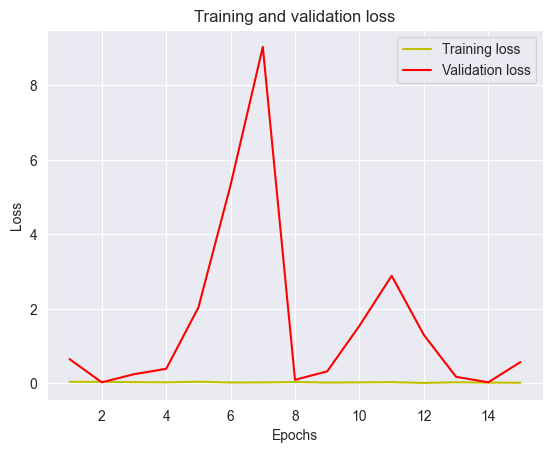

In [56]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

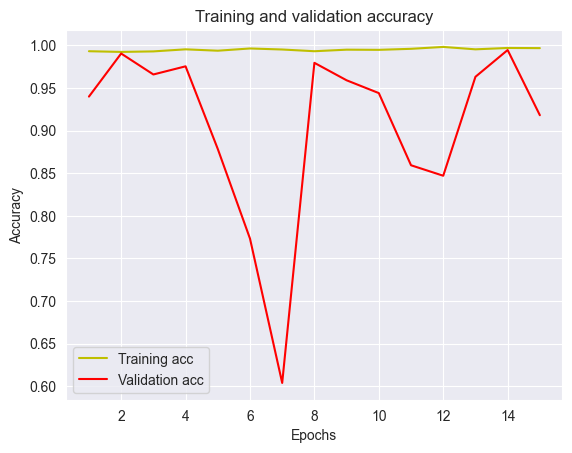

In [57]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

23/23 [==============================] - 11s 452ms/step


[[ 60  23   0   1   0]
 [ 15 110   6  13   0]
 [  1   8 145   9   7]
 [  1  25  12 142  11]
 [  0   0   1   0 142]]


<AxesSubplot: >

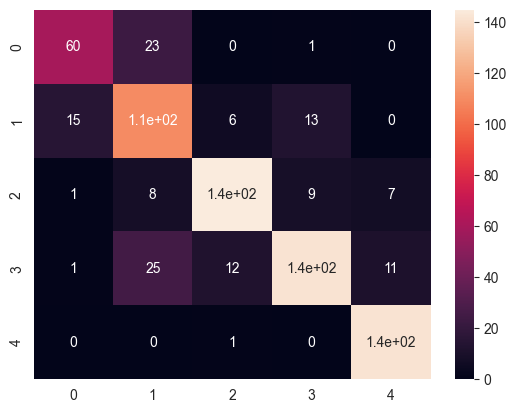

In [50]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)

1/1 [==============================] - 0s 95ms/step
The prediction for this image is:  ['over_ripe']
The actual label for this image is:  over_ripe


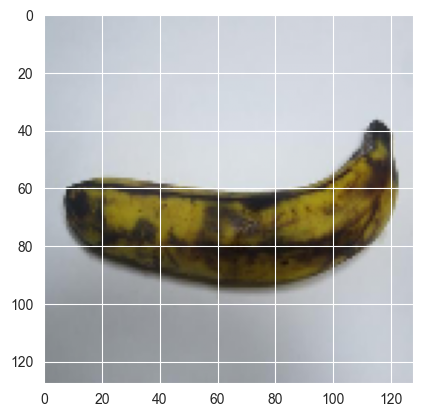

In [51]:
n=120  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])
